# Kickstarter Projects
## Notebook 04: Clustering

Group's members:
- Crnigoj Gabriele 134176
- Ferraro Tommaso 132998
- Stinat Kevin 134905

## Data Loading for Clustering

In [1]:
import numpy as np
import pandas as pd
import joblib
import pickle
import os
from tqdm import tqdm
from tempfile import mkdtemp

In [49]:
os.path.exists('Kickstarter_Dataframe')

True

In [50]:
savedir = 'Kickstarter_Dataframe'
filename = os.path.join(savedir, 'Kikstarter_Backup_File_Prova') 

with open(filename,'rb') as r:
    df = joblib.load(r)
    
df.shape

(79476, 23)

In [51]:
df.head()

,backers,usd_pledged_real,usd_goal_real,Launch_Year,Launch_Month,Deadline_Year,Deadline_Month,period_days,Documentary,Film & Video,...,Shorts,Tabletop Games,Design,Film & Video,Food,Games,Music,canceled,failed,successful
0,-0.121874,-0.098294,-0.041742,1.191785,1.094765,1.176878,1.299302,-0.060753,-0.45491,-0.331359,...,-0.386322,-0.39245,1.995231,-0.816938,-0.370722,-0.39245,-0.411291,-0.329039,1.050946,-0.863489
1,-0.076002,-0.079780,0.106267,-0.762258,0.792978,-0.809679,0.996768,-0.006175,-0.45491,-0.331359,...,-0.386322,-0.39245,1.995231,-0.816938,-0.370722,-0.39245,-0.411291,-0.329039,1.050946,-0.863489
2,-0.124786,-0.099306,-0.031043,0.703275,-1.319529,0.680239,-0.818436,0.266720,-0.45491,-0.331359,...,-0.386322,-0.39245,1.995231,-0.816938,-0.370722,-0.39245,-0.411291,-0.329039,1.050946,-0.863489
3,-0.117505,-0.094087,-0.030448,0.703275,0.491191,0.680239,0.694234,-0.060753,-0.45491,-0.331359,...,-0.386322,-0.39245,1.995231,-0.816938,-0.370722,-0.39245,-0.411291,-0.329039,1.050946,-0.863489
4,-0.124786,-0.099306,-0.032826,0.703275,-1.017743,0.680239,-0.818436,-0.060753,-0.45491,-0.331359,...,-0.386322,-0.39245,1.995231,-0.816938,-0.370722,-0.39245,-0.411291,-0.329039,1.050946,-0.863489


## Data Loading for Analysis

In [55]:
savedir = 'Kickstarter_Dataframe'
filename = os.path.join(savedir, 'Kikstarter_Backup_File_Prova_Predizione') 

with open(filename,'rb') as r:
    df_analysis = joblib.load(r)
    
df_analysis.shape

(79476, 11)

In [56]:
df_1 = df_analysis[1500:4500]
df_2 = df_analysis[30000:33000]
df_3 = df_analysis[45000:48000]
df_4 = df_analysis[78000:79476]

df_clustering_2 = pd.DataFrame(columns = df_analysis.columns)

df_clustering_2 = df_clustering_2.append(df_1)
df_clustering_2 = df_clustering_2.append(df_2)
df_clustering_2 = df_clustering_2.append(df_3)
df_clustering_2 = df_clustering_2.append(df_4)

df_clustering_2.drop(df_clustering_2.index[10021], inplace=True)
df_clustering_2.drop(df_clustering_2.index[10116], inplace=True)

df_clustering_2 = df_clustering_2.reset_index()
df_clustering_2 = df_clustering_2.drop(columns = 'index')

In [57]:
df_analysis.head()

,category,main_category,state,backers,usd_pledged_real,usd_goal_real,Launch_Year,Launch_Month,Deadline_Year,Deadline_Month,period_days
103,Product Design,Design,failed,4,156.0,500.0,2016,10,2016,11,29
121,Product Design,Design,failed,67,3012.0,125000.0,2012,9,2012,10,34
177,Product Design,Design,failed,0,0.0,9500.0,2015,2,2015,4,59
179,Product Design,Design,failed,10,805.0,10000.0,2015,8,2015,9,29
212,Product Design,Design,failed,0,0.0,8000.0,2015,3,2015,4,29


## Clustering

After a long evaluation we decide to use a lower number of rows, instead of the original 378 thousands. There are many reasons:
- we need a data sample which have to be statistical meaningful and not all all the rows
- the computational time is very reduced and we are able to apply more algorithms than before

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import AgglomerativeClustering as AC
from sklearn import metrics

In [59]:
df_clustering = pd.DataFrame(columns = df.columns)

df_1 = df[1500:4500]
df_2 = df[30000:33000]
df_3 = df[45000:48000]
df_4 = df[78000:79476]

df_clustering = df_clustering.append(df_1)
df_clustering = df_clustering.append(df_2)
df_clustering = df_clustering.append(df_3)
df_clustering = df_clustering.append(df_4)

df_clustering.drop(df_clustering.index[10021], inplace=True)
df_clustering.drop(df_clustering.index[10116], inplace=True)

df_clustering = df_clustering.reset_index()
df_clustering = df_clustering.drop(columns=['index'])

In [60]:
df_clustering.shape

(10474, 23)

In [61]:
df_clustering.head()

,backers,usd_pledged_real,usd_goal_real,Launch_Year,Launch_Month,Deadline_Year,Deadline_Month,period_days,Documentary,Film & Video,...,Shorts,Tabletop Games,Design,Film & Video,Food,Games,Music,canceled,failed,successful
0,-0.106583,-0.096233,-0.030448,0.703275,-0.414169,0.680239,-0.213368,-0.060753,-0.45491,-0.331359,...,-0.386322,-0.39245,1.995231,-0.816938,-0.370722,-0.39245,-0.411291,-0.329039,1.050946,-0.863489
1,-0.045420,-0.042401,-0.030448,1.191785,1.396552,1.176878,1.601835,-0.060753,-0.45491,-0.331359,...,-0.386322,-0.39245,1.995231,-0.816938,-0.370722,-0.39245,-0.411291,-0.329039,1.050946,-0.863489
2,-0.117505,-0.098690,0.017105,-0.762258,-0.414169,-0.809679,-0.213368,-0.060753,-0.45491,-0.331359,...,-0.386322,-0.39245,1.995231,-0.816938,-0.370722,-0.39245,-0.411291,-0.329039,1.050946,-0.863489
3,-0.104399,-0.040690,-0.006672,1.680296,0.491191,1.673517,0.996768,-0.006175,-0.45491,-0.331359,...,-0.386322,-0.39245,1.995231,-0.816938,-0.370722,-0.39245,-0.411291,-0.329039,1.050946,-0.863489
4,-0.114593,-0.083559,-0.036393,0.214764,1.396552,0.680239,-1.726037,0.266720,-0.45491,-0.331359,...,-0.386322,-0.39245,1.995231,-0.816938,-0.370722,-0.39245,-0.411291,-0.329039,1.050946,-0.863489


## Hierarchical Clustering

As first, we decide to do a hierarchical cluster analysis. The parameter linkage is set to ‘ward’ which is the best in our case. Our aim is to obtain a different cluster division which isn't base on, for example, the attributes 'category' or 'main_category'. This is only a first step because we are going to explore what is the best number of clusters by further analysis with other clustering algorithms.

In [9]:
from scipy.cluster import hierarchy as sch
from scipy.cluster.hierarchy import ward, dendrogram

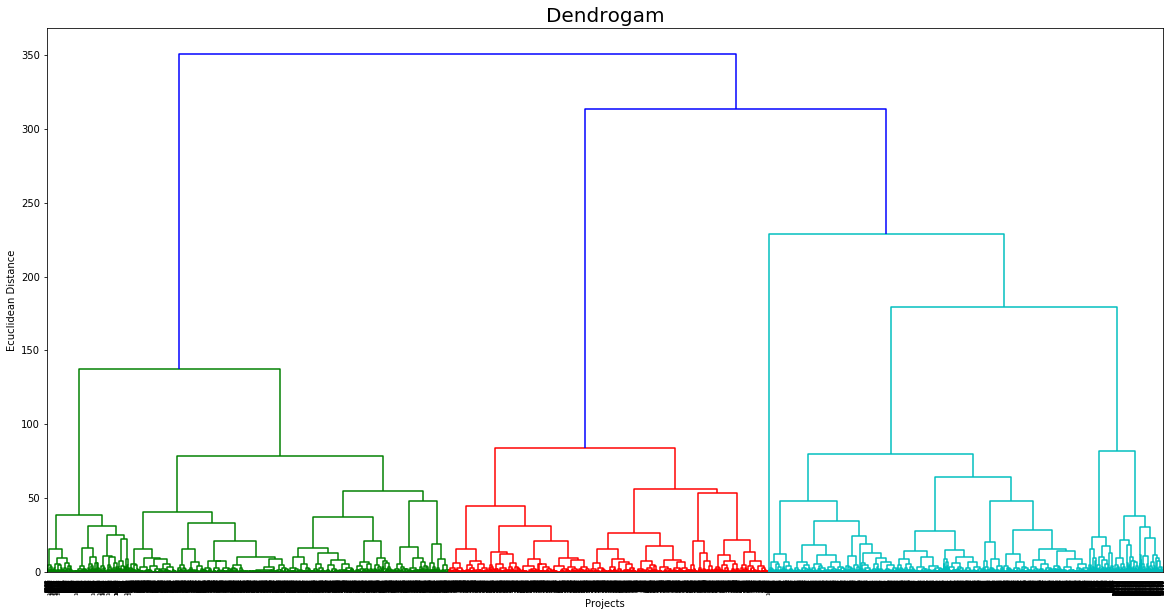

In [10]:
plt.rcParams['figure.figsize'] = (20, 10)
dendrogram = sch.dendrogram(sch.linkage(df_clustering, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Projects')
plt.ylabel('Ecuclidean Distance')
plt.show()

## Agglomerative Clustering

### Agglomerative Clustering: Average

in pratica tutto funziona e abbiamo scelto ward perchè migliore, inoltre omettiamo gli elbow di tutti e lasciamo quello di ward

In [11]:
labels_average = AC(n_clusters = 7, affinity = 'euclidean', linkage = 'average').fit_predict(df_clustering)
labels_average

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [12]:
metrics.silhouette_score(df_clustering, labels_average, metric = 'euclidean')

0.2505854602416973

### Agglomerative Clustering: Complete

In [13]:
labels_complete = AC(n_clusters = 5, affinity = 'euclidean', linkage = 'complete').fit_predict(df_clustering)
labels_complete

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [14]:
metrics.silhouette_score(df_clustering, labels_complete, metric = 'euclidean')

0.3744989228462334

### Agglomerative Clustering: Single

In [15]:
labels_single = AC(n_clusters = 5, affinity = 'euclidean', linkage = 'single').fit_predict(df_clustering)
labels_single

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [16]:
metrics.silhouette_score(df_clustering, labels_single, metric = 'euclidean')

0.36269161719619847

### Agglomerative Clustering: Ward

In [17]:
labels_ward = AC(n_clusters = 5, affinity = 'euclidean', linkage = 'ward').fit_predict(df_clustering)
labels_ward

array([2, 2, 2, ..., 1, 1, 1], dtype=int64)

In [18]:
metrics.silhouette_score(df_clustering, labels_ward, metric = 'euclidean')

0.5569742662106647

In [19]:
silhouette_df = pd.DataFrame({'n_clusters':[x for x in range(2,11)]})

for i in tqdm(range(0,9)):
    temp_clustering = AC(n_clusters = silhouette_df.n_clusters[i], affinity = 'euclidean',
                                           linkage = 'average').fit_predict(df_clustering)
    silhouette_df.loc[[i],'score'] = metrics.silhouette_score(df_clustering, temp_clustering)

100%|██████████| 9/9 [02:51<00:00, 19.09s/it]


Text(0.5, 1.0, 'Elbow Method AgglomerativeClustering (Average)')

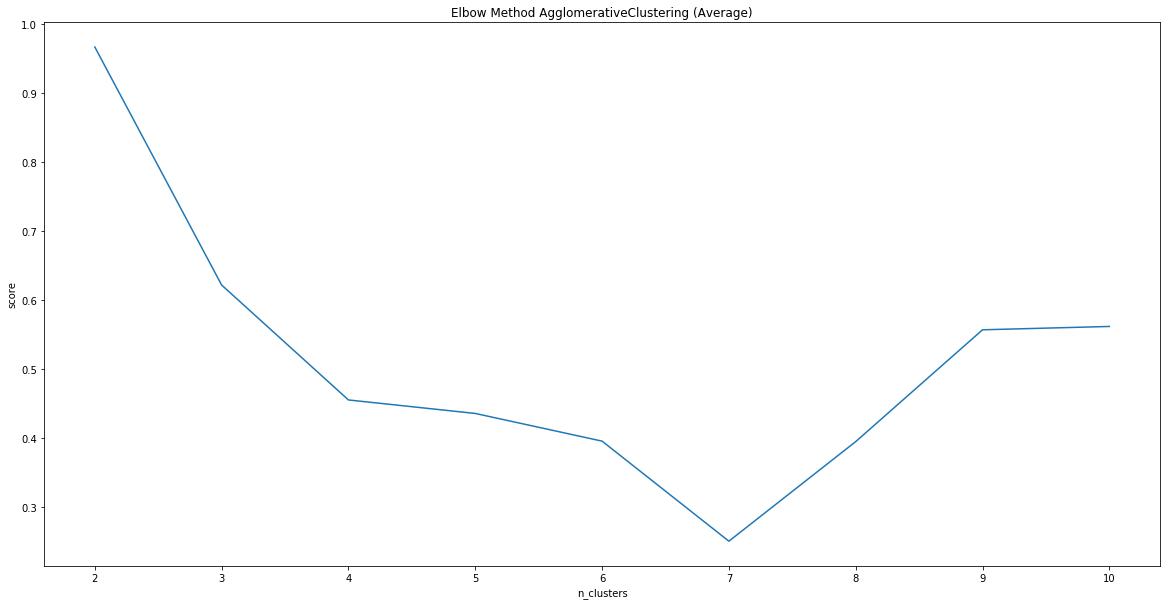

In [20]:
sns.lineplot(x = 'n_clusters', y = 'score', data = silhouette_df)
plt.title('Elbow Method AgglomerativeClustering (Average)')

In [21]:
labels_ward = AC(n_clusters = 7, affinity = 'euclidean', linkage = 'ward').fit_predict(df_clustering)
metrics.silhouette_score(df_clustering, labels_ward, metric = 'euclidean')

0.46812296693408517

### Plotting Agglomerative Clustering with PCA()

Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation which converts a set of correlated variables to a set of uncorrelated variables. PCA is an unsupervised statistical technique used to examine the interrelations among a set of variables. PCA is mostly used as a tool in exploratory data analysis and for making predictive models. It is often used to visualize genetic distance and relatedness between populations. It is a simplier method for analyse

links : https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Data_Visualization_Iris_Dataset_Blog.ipynb

In [22]:
from sklearn.decomposition import PCA

In [62]:
ward = pd.DataFrame(labels_ward)
df = pd.concat([df_clustering, ward], axis = 1)
df.rename(columns = {0:'Clusters'}, inplace=True)
df.head(2)

,backers,usd_pledged_real,usd_goal_real,Launch_Year,Launch_Month,Deadline_Year,Deadline_Month,period_days,Documentary,Film & Video,...,Tabletop Games,Design,Film & Video,Food,Games,Music,canceled,failed,successful,Clusters
0,-0.106583,-0.096233,-0.030448,0.703275,-0.414169,0.680239,-0.213368,-0.060753,-0.45491,-0.331359,...,-0.39245,1.995231,-0.816938,-0.370722,-0.39245,-0.411291,-0.329039,1.050946,-0.863489,4
1,-0.045420,-0.042401,-0.030448,1.191785,1.396552,1.176878,1.601835,-0.060753,-0.45491,-0.331359,...,-0.39245,1.995231,-0.816938,-0.370722,-0.39245,-0.411291,-0.329039,1.050946,-0.863489,6


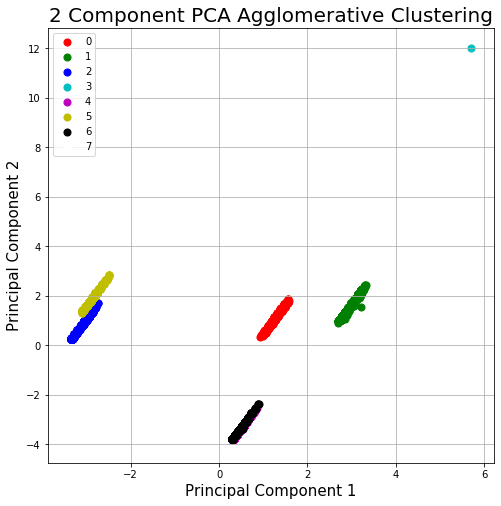

In [63]:
#PCA() application
pca_ward = PCA(n_components=2)
principalComponents = pca_ward.fit_transform(df_clustering)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

df[['Clusters']].head()
finalDf = pd.concat([principalDf, df[['Clusters']]], axis = 1)

#Plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA Agglomerative Clustering', fontsize = 20)
targets = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Clusters'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [93]:
df_ACW = pd.concat([df_clustering_2, ward], axis = 1)
df_ACW.rename(columns = {0:'Clusters'}, inplace=True)
df_ACW.head(2)

,category,main_category,state,backers,usd_pledged_real,usd_goal_real,Launch_Year,Launch_Month,Deadline_Year,Deadline_Month,period_days,Clusters
0,Product Design,Design,failed,25,474.0,10000.0,2015,5,2015,6,29,4
1,Product Design,Design,failed,109,8778.0,10000.0,2016,11,2016,12,29,6


In [94]:
df_ACW.groupby('Clusters')['category'].count()

Clusters
0     699
1    3000
2    2999
3       1
4    1678
5     775
6    1322
Name: category, dtype: int64

## KMeans

stesso ragionamento, ma con kmeans, il secondo metodo è sicuramnte migliore per lo score

In [66]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                         tol=0.0001,  random_state= 111  , algorithm='elkan')

km_clusters = kmeans.fit_predict(df_clustering)

In [67]:
metrics.silhouette_score(df_clustering, km_clusters)

0.5568882163490559

In [68]:
silhouette_kmeans = pd.DataFrame({'n_clusters':[x for x in range(2,11)]})

for i in tqdm(range(0,9)):  #the dataframe 8 rows
    
    temp_clustering = KMeans(n_clusters = silhouette_kmeans.n_clusters[i], random_state = 0, algorithm = 'elkan').fit_predict(df_clustering)
    silhouette_kmeans.loc[[i],'score'] = metrics.silhouette_score(df_clustering, temp_clustering)

100%|██████████| 9/9 [01:11<00:00,  8.06s/it]


Text(0.5, 1.0, 'Elbow Method Kmeans')

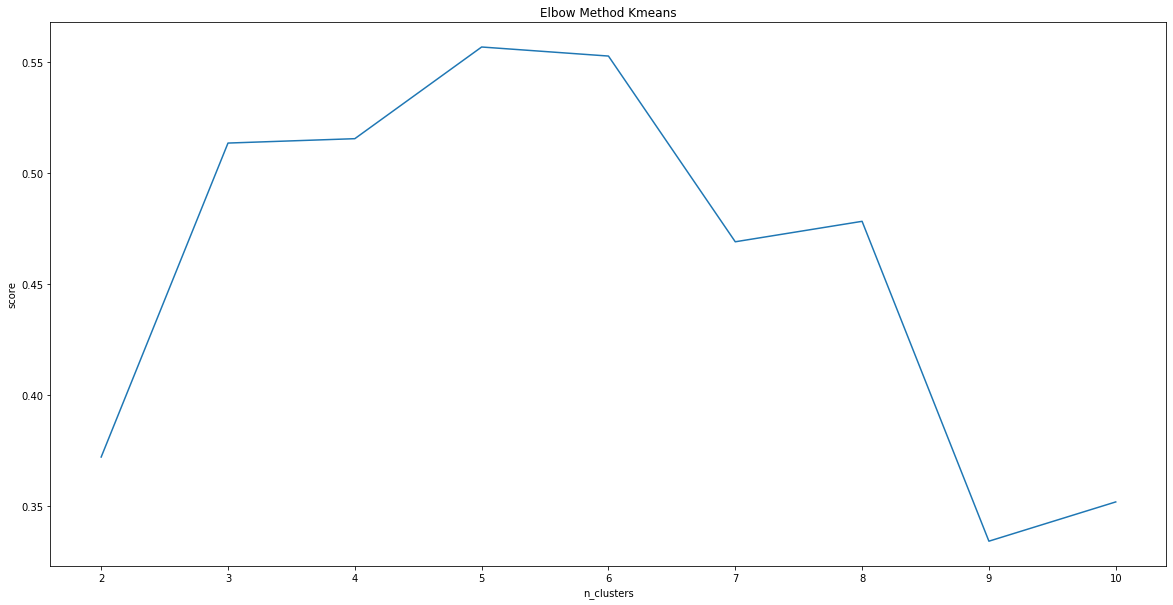

In [69]:
sns.lineplot(x ='n_clusters', y = 'score', data = silhouette_kmeans)
plt.title('Elbow Method Kmeans')

In [70]:
#7 o 9?

kmeans_2 = KMeans(n_clusters = 7 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan')

km_clusters_2 = kmeans_2.fit_predict(df_clustering)
metrics.silhouette_score(df_clustering, km_clusters_2)

0.4653028214359329

### Plot KMeans with PCA()

In [71]:
km = pd.DataFrame(km_clusters_2)
df = pd.concat([df_clustering, km], axis = 1)
df.rename(columns = {0:'Clusters'}, inplace=True)
df.head(2)

,backers,usd_pledged_real,usd_goal_real,Launch_Year,Launch_Month,Deadline_Year,Deadline_Month,period_days,Documentary,Film & Video,...,Tabletop Games,Design,Film & Video,Food,Games,Music,canceled,failed,successful,Clusters
0,-0.106583,-0.096233,-0.030448,0.703275,-0.414169,0.680239,-0.213368,-0.060753,-0.45491,-0.331359,...,-0.39245,1.995231,-0.816938,-0.370722,-0.39245,-0.411291,-0.329039,1.050946,-0.863489,1
1,-0.045420,-0.042401,-0.030448,1.191785,1.396552,1.176878,1.601835,-0.060753,-0.45491,-0.331359,...,-0.39245,1.995231,-0.816938,-0.370722,-0.39245,-0.411291,-0.329039,1.050946,-0.863489,1


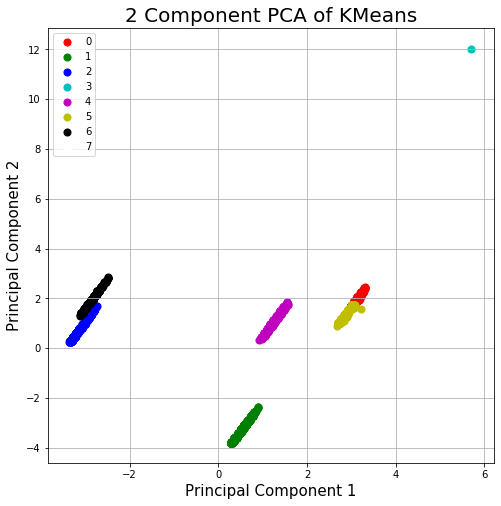

In [72]:
# PCA() application
finalDf = pd.concat([principalDf, df[['Clusters']]], axis = 1)
finalDf.head(5)

#Plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA of KMeans', fontsize = 20)
targets = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Clusters'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [141]:
df_kms = pd.concat([df_clustering_2, km], axis = 1)
df_kms.rename(columns = {0:'Clusters'}, inplace=True)
df_kms.head(2)

,category,main_category,state,backers,usd_pledged_real,usd_goal_real,Launch_Year,Launch_Month,Deadline_Year,Deadline_Month,period_days,Clusters
0,Product Design,Design,failed,25,474.0,10000.0,2015,5,2015,6,29,1
1,Product Design,Design,failed,109,8778.0,10000.0,2016,11,2016,12,29,1


In [142]:
df_kms.groupby('Clusters')['category'].count()

Clusters
0    1677
1    3000
2    3000
3       1
4     698
5    1323
6     775
Name: category, dtype: int64

# QUESTO é UN PLOT IN 3D MA PER ME NON é PIU SIGNIFICATIVO DEL 2D

In [75]:
from sklearn.decomposition import PCA
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

In [76]:
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Keep the 'specie' column appart + make it numeric for coloring
df['Clusters']=pd.Categorical(df['Clusters'])
my_color=df['Clusters'].cat.codes
df = df.drop('Clusters', 1)

pca = PCA(n_components=3)
pca.fit(df_clustering)

result=pd.DataFrame(pca.transform(df_clustering), columns=['PCA%i' % i for i in range(3)], index=df.index)
result.head()

,PCA0,PCA1,PCA2
0,0.465797,-3.428334,0.044780
1,0.368006,-3.616901,-0.111511
2,0.685832,-2.904276,0.492865
3,0.305405,-3.781869,-0.205442
4,0.505038,-3.348919,0.463524


<Figure size 480x480 with 0 Axes>

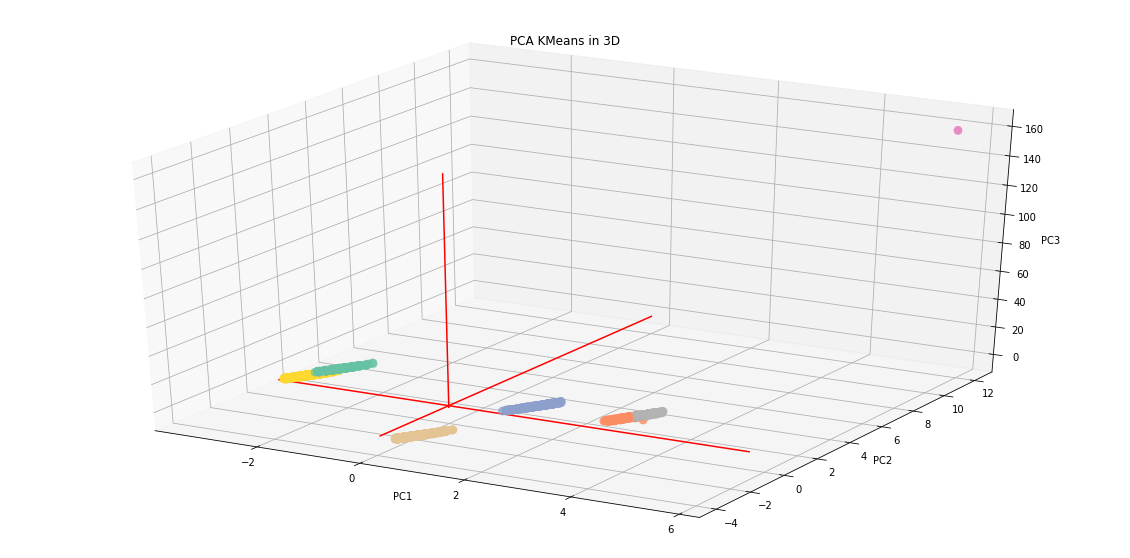

In [77]:
# Plot initialisation
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color, cmap="Set2_r", s=60)

# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA KMeans in 3D")


plt.show()

### DBSCAN

In [78]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 4, min_samples = 5, metric = 'euclidean').fit_predict(df_clustering)
db

array([0, 0, 0, ..., 4, 4, 4], dtype=int64)

In [79]:
metrics.silhouette_score(df_clustering, db)

0.5609199343329515

### Plotting DBSCAN with PCA()

In [80]:
df_db = pd.DataFrame(db)
df = pd.concat([df_clustering, df_db], axis = 1)
df.rename(columns = {0:'Clusters'}, inplace=True)
df.head(2)

,backers,usd_pledged_real,usd_goal_real,Launch_Year,Launch_Month,Deadline_Year,Deadline_Month,period_days,Documentary,Film & Video,...,Tabletop Games,Design,Film & Video,Food,Games,Music,canceled,failed,successful,Clusters
0,-0.106583,-0.096233,-0.030448,0.703275,-0.414169,0.680239,-0.213368,-0.060753,-0.45491,-0.331359,...,-0.39245,1.995231,-0.816938,-0.370722,-0.39245,-0.411291,-0.329039,1.050946,-0.863489,0
1,-0.045420,-0.042401,-0.030448,1.191785,1.396552,1.176878,1.601835,-0.060753,-0.45491,-0.331359,...,-0.39245,1.995231,-0.816938,-0.370722,-0.39245,-0.411291,-0.329039,1.050946,-0.863489,0


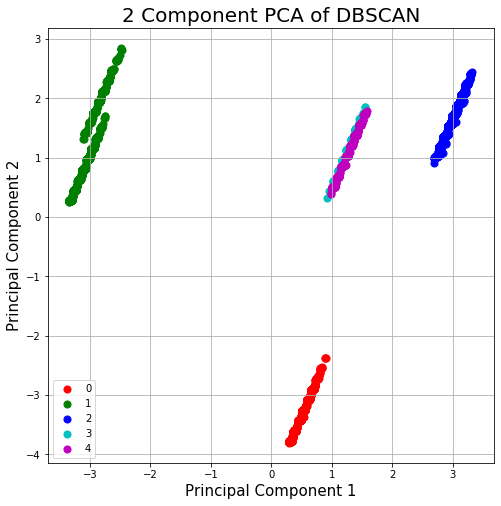

In [81]:
# PCA() application
finalDf = pd.concat([principalDf, df[['Clusters']]], axis = 1)
finalDf.head(5)

#Plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA of DBSCAN', fontsize = 20)
targets = [0, 1, 2, 3, 4]
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Clusters'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [82]:
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Keep the 'specie' column appart + make it numeric for coloring
df['Clusters']=pd.Categorical(df['Clusters'])
my_color=df['Clusters'].cat.codes
df = df.drop('Clusters', 1)

pca = PCA(n_components=3)
pca.fit(df_clustering)

result=pd.DataFrame(pca.transform(df_clustering), columns=['PCA%i' % i for i in range(3)], index=df.index)
result.head()

,PCA0,PCA1,PCA2
0,0.465797,-3.428334,0.044780
1,0.368006,-3.616901,-0.111511
2,0.685832,-2.904276,0.492865
3,0.305405,-3.781869,-0.205442
4,0.505038,-3.348919,0.463524


<Figure size 480x480 with 0 Axes>

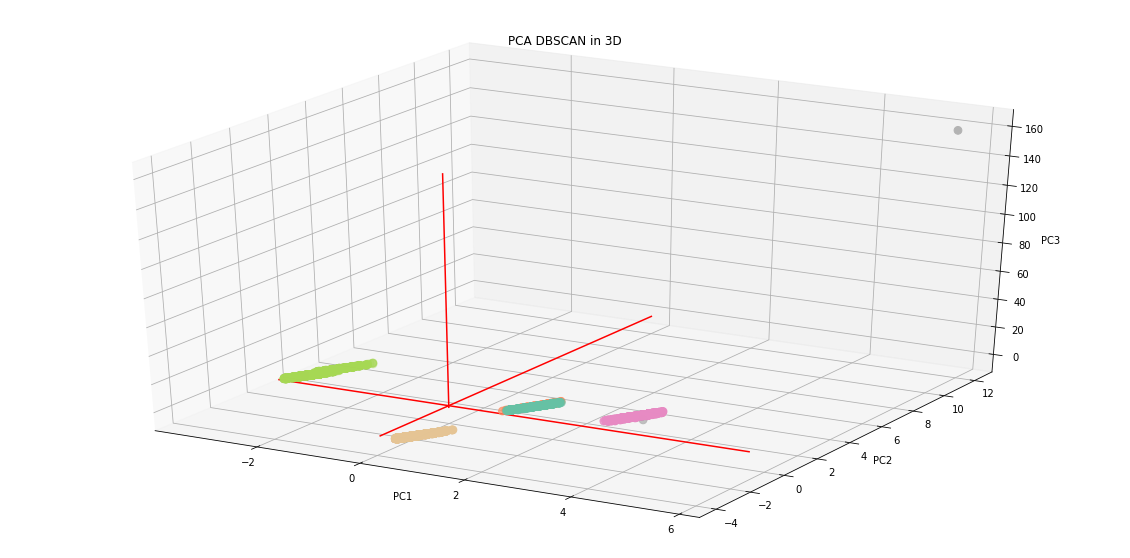

In [87]:
# Plot initialisation
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color, cmap="Set2_r", s=60)

# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA DBSCAN in 3D")


plt.show()

In [91]:
df_DBS = pd.concat([df_clustering_2, df_db], axis = 1)
df_DBS.rename(columns = {0:'Clusters'}, inplace=True)
df_DBS.groupby('Clusters')['category'].count()

Clusters
-1       4
 0    3000
 1    3774
 2    2999
 3     242
 4     455
Name: category, dtype: int64

### Affinity Propagation

In [85]:
from sklearn.cluster import AffinityPropagation

AF = AffinityPropagation(damping = 0.99, affinity = 'euclidean').fit_predict(df_clustering)
AF

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [86]:
metrics.silhouette_score(df_clustering, AF)

0.298725150993344

## Algorithm Analysis: AC Ward, Kmeans and DBSCAN

In [143]:
df_ACW = df_ACW.fillna(0)
df_DBS = df_DBS.fillna(0)
df_kms = df_kms.fillna(0)

In [114]:
numerical = ['backers', 'usd_pledged_real','usd_goal_real', 'Launch_Year', 'Launch_Month',
             'Deadline_Year','Deadline_Month', 'period_days']

In [137]:
#df_kms.drop(columns = ['category', 'main_category'], inplace= True)

### Agglomerative Clustering: Ward

In [156]:
df_kms.head(2)

,category,main_category,state,backers,usd_pledged_real,usd_goal_real,Launch_Year,Launch_Month,Deadline_Year,Deadline_Month,period_days,Clusters
0,Product Design,Design,failed,25,474.0,10000.0,2015,5,2015,6,29,1
1,Product Design,Design,failed,109,8778.0,10000.0,2016,11,2016,12,29,1


In [ ]:
for i in range(0, )

In [147]:
df_DBS.groupby('main_category')['Clusters'].count()

main_category
Design          3000
Film & Video    3699
Food            3775
Name: Clusters, dtype: int64

In [148]:
df_DBS.groupby('category')['Clusters'].count()

category
Documentary       3000
Film & Video       457
Food              3775
Product Design    3000
Shorts             242
Name: Clusters, dtype: int64

### Kmeans

In [155]:
df_kms.head(2)

,category,main_category,state,backers,usd_pledged_real,usd_goal_real,Launch_Year,Launch_Month,Deadline_Year,Deadline_Month,period_days,Clusters
0,Product Design,Design,failed,25,474.0,10000.0,2015,5,2015,6,29,1
1,Product Design,Design,failed,109,8778.0,10000.0,2016,11,2016,12,29,1


### DBSCAN

In [154]:
df_DBS.head(2)

,category,main_category,state,backers,usd_pledged_real,usd_goal_real,Launch_Year,Launch_Month,Deadline_Year,Deadline_Month,period_days,Clusters
0,Product Design,Design,failed,25,474.0,10000.0,2015,5,2015,6,29,0
1,Product Design,Design,failed,109,8778.0,10000.0,2016,11,2016,12,29,0


In [166]:
temp = df_DBS
temp = temp.drop(temp[temp.Clusters != -1].index)

In [168]:
temp

,category,main_category,state,backers,usd_pledged_real,usd_goal_real,Launch_Year,Launch_Month,Deadline_Year,Deadline_Month,period_days,Clusters
3706,Food,Food,failed,0,0.00,9592440.0,2014,10,2014,12,32,-1
8335,Documentary,Film & Video,successful,16850,859425.69,650000.0,2015,7,2015,8,31,-1
10115,Film & Video,Film & Video,canceled,0,0.00,700.0,1970,1,2010,5,14749,-1
10228,Film & Video,Film & Video,canceled,0,0.00,10474836.0,2014,1,2014,2,29,-1


In [169]:
temp.groupby('category')['Clusters'].count()

category
Documentary     1
Film & Video    2
Food            1
Name: Clusters, dtype: int64

In [170]:
temp.describe()

,backers,usd_pledged_real,usd_goal_real,Launch_Year,Launch_Month,Deadline_Year,Deadline_Month,period_days,Clusters
count,4.0,4.0000,4.000000e+00,4.000000,4.00,4.000000,4.000000,4.000000,4.0
mean,4212.5,214856.4225,5.179494e+06,2003.250000,4.75,2013.250000,6.750000,3710.250000,-1.0
std,8425.0,429712.8450,5.622898e+06,22.171679,4.50,2.217356,4.272002,7359.166772,0.0
min,0.0,0.0000,7.000000e+02,1970.000000,1.00,2010.000000,2.000000,29.000000,-1.0
25%,0.0,0.0000,4.876750e+05,2003.000000,1.00,2013.000000,4.250000,30.500000,-1.0
50%,0.0,0.0000,5.121220e+06,2014.000000,4.00,2014.000000,6.500000,31.500000,-1.0
75%,4212.5,214856.4225,9.813039e+06,2014.250000,7.75,2014.250000,9.000000,3711.250000,-1.0
max,16850.0,859425.6900,1.047484e+07,2015.000000,10.00,2015.000000,12.000000,14749.000000,-1.0
